In [1]:
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
!pip install opencv-contrib-python

In [206]:
img = cv2.imread('./test_images/riri1.jpg')
img.shape

(250, 201, 3)

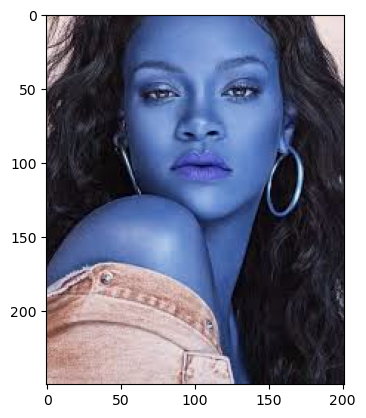

In [208]:
plt.imshow(img)
plt.show()

In [210]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(250, 201)

In [212]:
gray

array([[217, 223, 205, ..., 220, 220, 218],
       [186, 155, 196, ..., 221, 221, 218],
       [196, 200, 190, ..., 221, 221, 220],
       ...,
       [188, 197, 185, ...,  22,  29,  28],
       [194, 197, 186, ...,  29,  25,  23],
       [190, 195, 184, ...,  29,  25,  23]], dtype=uint8)

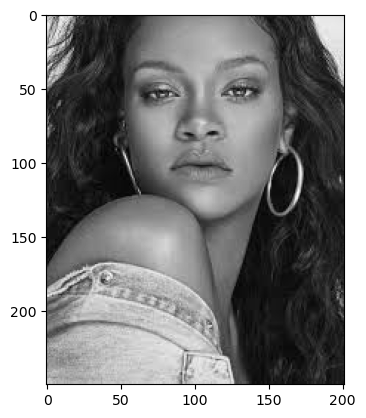

In [214]:
plt.imshow(gray, cmap = 'gray')
plt.show()

In [216]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 46,   8, 123, 123]])

In [218]:
(x,y,w,h) = faces[0]
x,y,w,h

(46, 8, 123, 123)

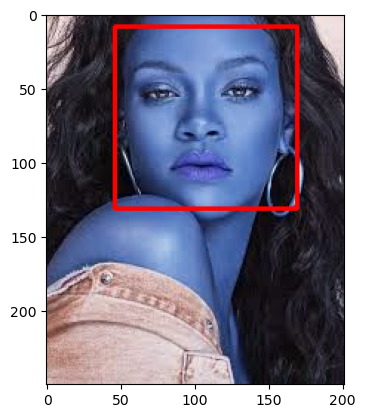

In [220]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

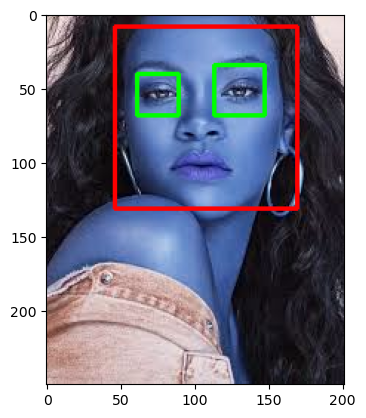

In [222]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

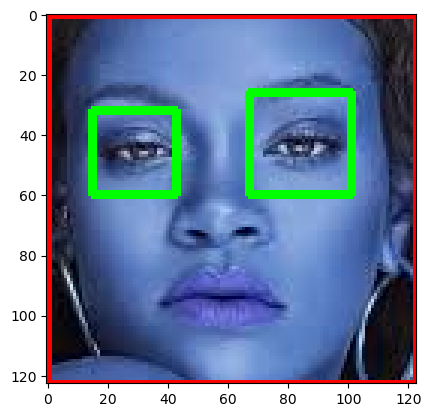

In [224]:
%matplotlib inline
plt.imshow(roi_color, cmap ='gray')
plt.show()

In [226]:
cropped_img = np.array(roi_color)
cropped_img.shape

(123, 123, 3)

In [232]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

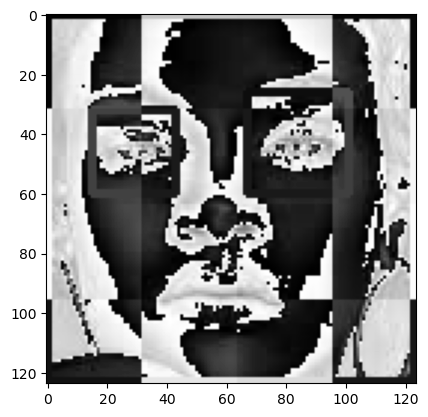

In [238]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [288]:
def get_cropped_image_if_2_eyes(image_path):
    print(f"Processing: {image_path}")  
    if not os.path.exists(image_path):
        print(f"Error: {image_path} does not exist!")
        return None

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Cannot read {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Ensure img is not None
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_color = img[y:y+h, x:x+w]
        return roi_color

    return None


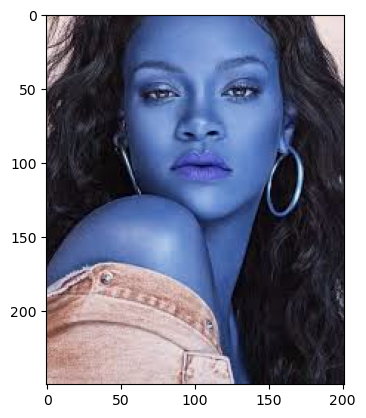

In [290]:
original_image = cv2.imread('./test_images/riri1.jpg')
plt.imshow(original_image)
plt.show()

Processing: ./test_images/riri1.jpg


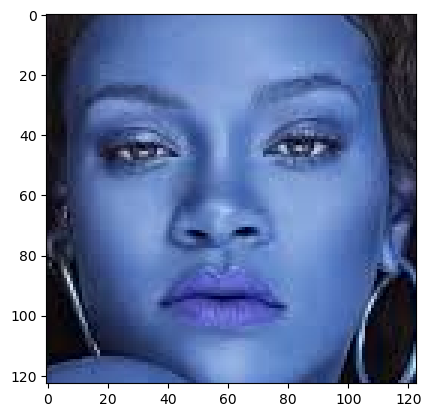

In [292]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/riri1.jpg')
plt.imshow(cropped_image)
plt.show()

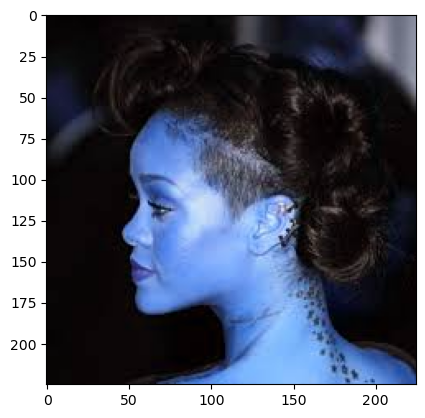

In [299]:
org_image_obstructed = cv2.imread('./test_images/riri3.jpg')
plt.imshow(org_image_obstructed)
plt.show()

In [303]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/riri3.jpg')
cropped_image_no_2_eyes

Processing: ./test_images/riri3.jpg


In [278]:
import os

path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

# Ensure the cropped folder exists
if not os.path.exists(path_to_cr_data):
    os.makedirs(path_to_cr_data)
    print(f"Created folder: {path_to_cr_data}")

# Get all image directories
img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

print("Image directories:", img_dirs)


Created folder: ./dataset/cropped/
Image directories: ['./dataset/cropped', './dataset/elon_musk', './dataset/jeff_bezos', './dataset/larry_ellison', './dataset/mark_zuckerberg', './dataset/rihanna_riri']


In [274]:

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [55]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

def get_cropped_image_if_2_eyes(image_path):
    """Reads an image, detects faces, and returns a cropped face if two eyes are detected."""
    img = cv2.imread(image_path)

    if img is None:
        print(f"❌ OpenCV failed to read image: {image_path}")
        return None

    print(f"✅ Image loaded successfully: {image_path}, Shape: {img.shape}")  # Debugging print

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        print(f"❌ No faces detected in {image_path}")
        return None

    for (x, y, w, h) in faces:
        return img[y:y+h, x:x+w]  # Crop and return first detected face

    return None

# Loop through each image directory
for img_dir in img_dirs:
    print(f"🔍 Checking directory: {img_dir}")  # Debugging print

    if not os.path.exists(img_dir):
        print(f"❌ Directory does not exist: {img_dir}")
        continue

    count = 1
    celebrity_name = os.path.basename(img_dir)
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if not entry.is_file():
            print(f"⚠️ Skipping non-file: {entry.path}")
            continue

        if not entry.path.lower().endswith(('.jpg', '.jpeg', '.png')):  # Ensure valid formats
            print(f"⚠️ Skipping unsupported file format: {entry.path}")
            continue

        print(f"✅ Processing file: {entry.path}")  # Debugging print

        if not os.path.exists(entry.path):
            print(f"❌ File does not exist: {entry.path}")
            continue

        roi_color = get_cropped_image_if_2_eyes(entry.path)

        if roi_color is None:
            print(f"⚠️ Skipping {entry.path} (No face detected or image is unreadable)")
            continue

        cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
        if not os.path.exists(cropped_folder):
            os.makedirs(cropped_folder)
            cropped_image_dirs.append(cropped_folder)
            print(f"📂 Generating cropped images in folder: {cropped_folder}")

        cropped_file_name = f"{celebrity_name}{count}.png"
        cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
        cv2.imwrite(cropped_file_path, roi_color)
        celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
        count += 1

print("✅ Processing complete!")


🔍 Checking directory: ./dataset/cropped
🔍 Checking directory: ./dataset/elon_musk
✅ Processing file: ./dataset/elon_musk\.jpg
❌ OpenCV failed to read image: ./dataset/elon_musk\.jpg
⚠️ Skipping ./dataset/elon_musk\.jpg (No face detected or image is unreadable)
✅ Processing file: ./dataset/elon_musk\14,888 Elon Musk Photos & High Res ....jpg
✅ Image loaded successfully: ./dataset/elon_musk\14,888 Elon Musk Photos & High Res ....jpg, Shape: (183, 275, 3)
📂 Generating cropped images in folder: ./dataset/cropped/elon_musk
✅ Processing file: ./dataset/elon_musk\609 Elon Musk Portrait Stock Photos ....jpg
✅ Image loaded successfully: ./dataset/elon_musk\609 Elon Musk Portrait Stock Photos ....jpg, Shape: (177, 285, 3)
✅ Processing file: ./dataset/elon_musk\acquisition revealed in court documents.jpg
✅ Image loaded successfully: ./dataset/elon_musk\acquisition revealed in court documents.jpg, Shape: (183, 275, 3)
✅ Processing file: ./dataset/elon_musk\Best Elon Royalty-Free Images, Stock ....

In [311]:
img_dirs

['./dataset/cropped',
 './dataset/elon_musk',
 './dataset/jeff_bezos',
 './dataset/larry_ellison',
 './dataset/mark_zuckerberg',
 './dataset/rihanna_riri']

In [317]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [319]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Processing: ./dataset/elon_musk\10+] Elon Musk Wallpapers.jpg
Generating cropped images in folder:  ./dataset/cropped/elon_musk
Processing: ./dataset/elon_musk\100+] Elon Musk Wallpapers _ Wallpapers.com.jpg
Processing: ./dataset/elon_musk\15,801 Elon Musk Photos & High Res ....jpg
Processing: ./dataset/elon_musk\2 Elon Musk, elon musk tesla HD phone ....jpg
Processing: ./dataset/elon_musk\2,891 Elon Musk Stock Photos - Free ....jpg
Processing: ./dataset/elon_musk\21 Elon musk hd ideas _ elon musk, elon ....jpg
Processing: ./dataset/elon_musk\2932x2932 Elon Musk 4k Ipad Pro Retina ....jpg
Processing: ./dataset/elon_musk\410 Elon Musk ideas _ elon musk, elon, musk.jpg
Processing: ./dataset/elon_musk\607 Elon Musk Portrait Stock Photos ....jpg
Processing: ./dataset/elon_musk\614 Elon Musk Portrait Stock Photos ....jpg
Processing: ./dataset/elon_musk\A touch of madness_ Elon Musk.jpg
Processing: ./dataset/elon_musk\accept Bitcoin transactions ....jpg
Processing: ./dataset/elon_musk\Best E

In [321]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'elon_musk': ['./dataset/cropped/elon_musk\\elon_musk1.png',
  './dataset/cropped/elon_musk\\elon_musk10.png',
  './dataset/cropped/elon_musk\\elon_musk11.png',
  './dataset/cropped/elon_musk\\elon_musk12.png',
  './dataset/cropped/elon_musk\\elon_musk13.png',
  './dataset/cropped/elon_musk\\elon_musk14.png',
  './dataset/cropped/elon_musk\\elon_musk15.png',
  './dataset/cropped/elon_musk\\elon_musk16.png',
  './dataset/cropped/elon_musk\\elon_musk17.png',
  './dataset/cropped/elon_musk\\elon_musk18.png',
  './dataset/cropped/elon_musk\\elon_musk19.png',
  './dataset/cropped/elon_musk\\elon_musk2.png',
  './dataset/cropped/elon_musk\\elon_musk20.png',
  './dataset/cropped/elon_musk\\elon_musk21.png',
  './dataset/cropped/elon_musk\\elon_musk22.png',
  './dataset/cropped/elon_musk\\elon_musk23.png',
  './dataset/cropped/elon_musk\\elon_musk24.png',
  './dataset/cropped/elon_musk\\elon_musk25.png',
  './dataset/cropped/elon_musk\\elon_musk26.png',
  './dataset/cropped/elon_musk\\elon_mu

In [327]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'elon_musk': 0,
 'jeff_bezos': 1,
 'larry_ellison': 2,
 'mark_zuckerberg': 3,
 'rihanna_riri': 4}

In [331]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',3)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [337]:
len(X[0])

4096

In [339]:
X[0]

array([[183],
       [163],
       [155],
       ...,
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [341]:
y[0]

0

In [345]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(179, 4096)

In [347]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6444444444444445

In [351]:
len(X_test)

45

In [353]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.89      0.73      0.80        11
           2       0.58      0.78      0.67         9
           3       0.71      0.56      0.62         9
           4       0.50      0.33      0.40         6

    accuracy                           0.64        45
   macro avg       0.64      0.62      0.62        45
weighted avg       0.66      0.64      0.64        45



## Gridsearch

In [355]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [357]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [359]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.679202,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.395157,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.678348,{'logisticregression__C': 1}


In [361]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [363]:
best_estimators['svm'].score(X_test, y_test)

0.6888888888888889

In [365]:
best_estimators['random_forest'].score(X_test,y_test)

0.37777777777777777

In [367]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7555555555555555

In [369]:
best_clf = best_estimators['logistic_regression']

In [371]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  1,  1,  2],
       [ 0, 10,  0,  0,  1],
       [ 0,  0,  8,  1,  0],
       [ 0,  0,  0,  7,  2],
       [ 1,  0,  0,  1,  4]], dtype=int64)

<Figure size 1000x700 with 0 Axes>

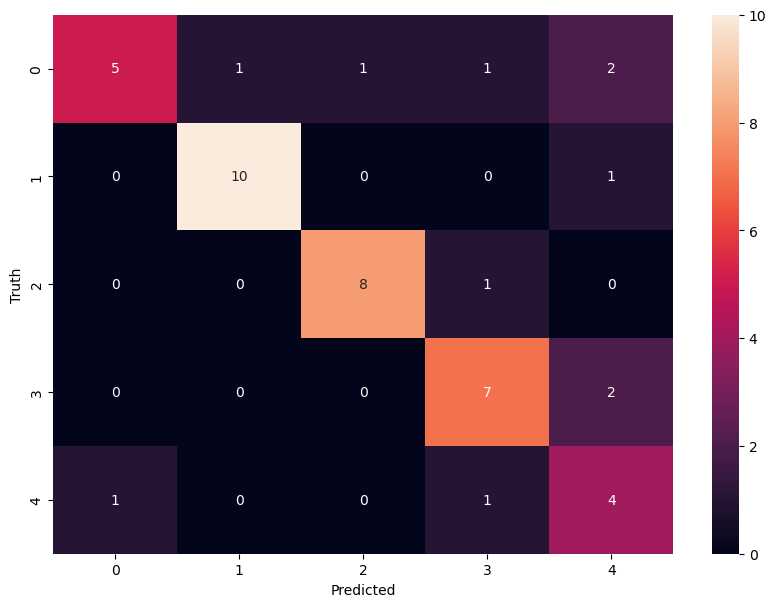

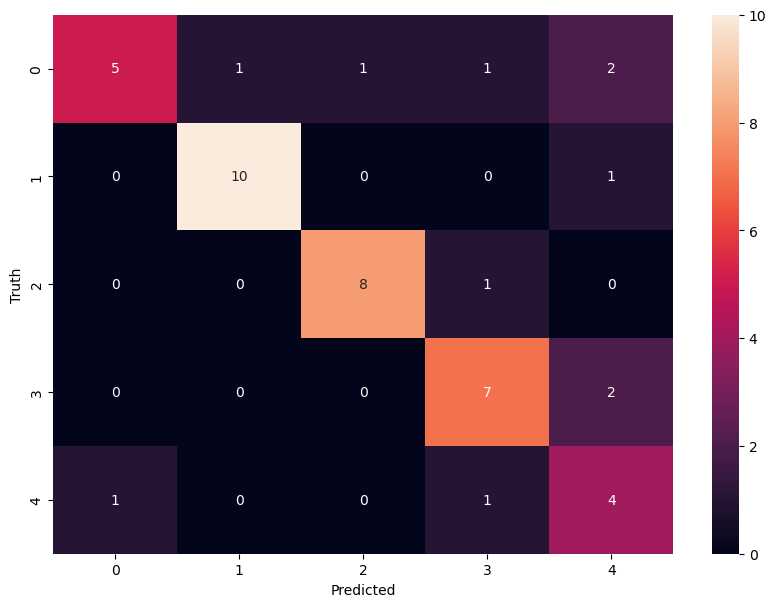

In [377]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Saving Model

In [379]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pk1')

['saved_model.pk1']

## Saving class dictionary

In [382]:
class_dict

{'elon_musk': 0,
 'jeff_bezos': 1,
 'larry_ellison': 2,
 'mark_zuckerberg': 3,
 'rihanna_riri': 4}

In [384]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))